Exercício - Hands on Machine Learning with Scikit-Learn and TensorFlow- Capitulo 2


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Primeira etapa, carregar o dataset que será utilizado. Neste caso, esta em formato csv.

In [2]:
data = pd.read_csv('housing.csv', delimiter = ',')

Vamos analisar algumas informações básicas e de forma rápida do dataset carregado. 
O método head() permite olhar os primiros elementos do dataset. Bom para ter uma noção inicial de como estão os dados.
Já o método info(), acresenta mais informção com relação ao total de elementos, tipos das variáveis, se há valores nulos, colunas...


In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Parace que a feature 'total_bedrooms' há elementos faltantes... Uma forma de visualizar isto, pode ser através do heatmap de elementos e o método isnull() do pandas. :) Mais interessante quando há mais elementos faltantes...

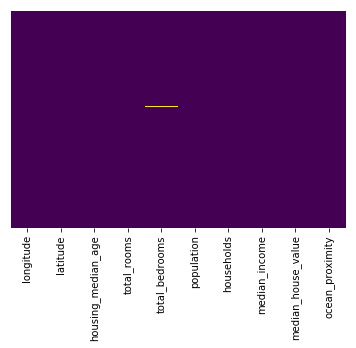

In [5]:
sns.heatmap(data.isnull(),cmap = 'viridis',yticklabels = False, cbar =False)

 A porcentagem faltande de dados para a caracteristica 'total_bedrooms' é de aprox 1%, muito? pouco?

In [6]:
PorcentagemFaltante = ( len(data) - data['total_bedrooms'].count())*100 / len(data)

Com exceção da caracteristica 'ocean_proximity', todas as outras são númericas. 'Ocean_proximity' por sua vez, é categorica. Quantas cetegorias são?

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

4 Categorias, sendo Island contendo apenas 5 amostras...

In [8]:
data[data['ocean_proximity']== 'ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8D899FFD0>,
      dtype=object)

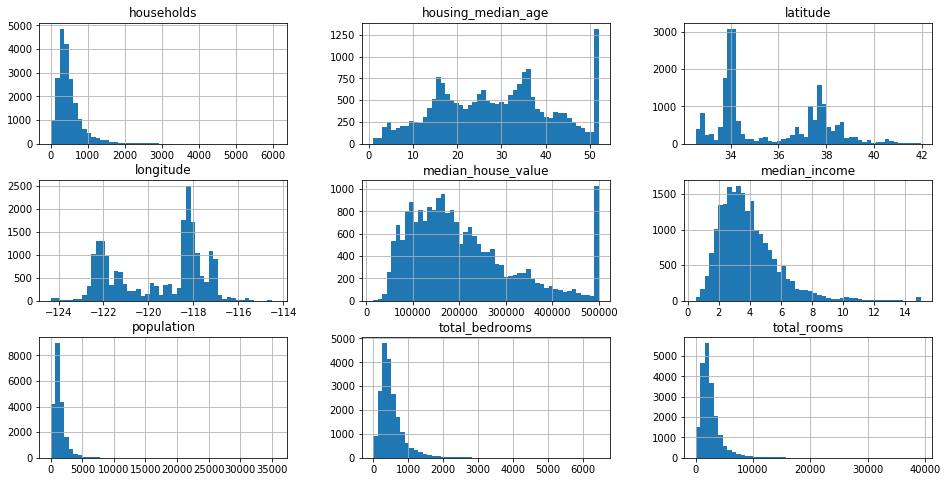

In [9]:
data.hist(bins = 50, figsize = (16,8))

### Separando os dados em treinamento e teste

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [12]:
print(train_set.size, test_set.size)

165120 41280


### Analisando os dados de treinamento

In [13]:
housing = train_set.copy()

Visualizando os dados através das coordenadas e realçando através das categorias em 'ocean_proximity'

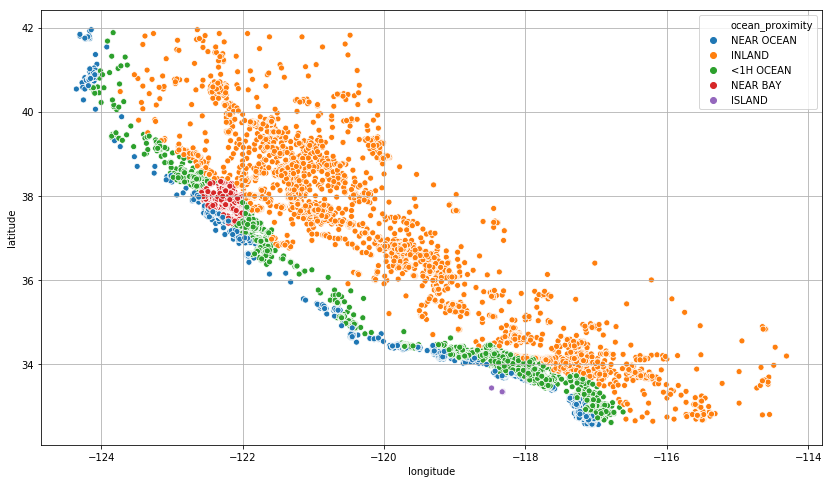

In [14]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = housing, hue ='ocean_proximity')
plt.grid()

Visualizando a densidade

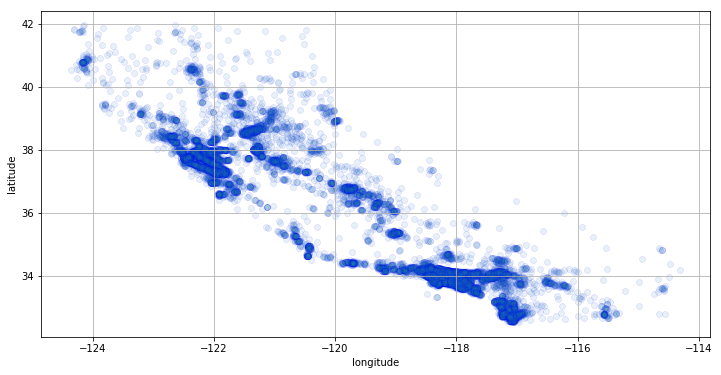

In [15]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'longitude', y = 'latitude', data = housing, alpha = 0.1, edgecolor = 'blue')
plt.grid()

verificando a relação de posição e valor das casas.

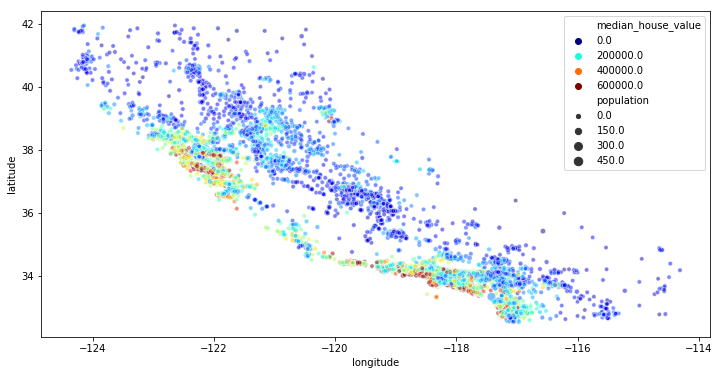

In [25]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'longitude',y = 'latitude', data = housing, hue = 'median_house_value', 
                palette = 'jet', size = housing['population']/100, alpha = 0.5)


Analisando a correlação entre as outras features

In [17]:
matrix_corr = housing.corr()

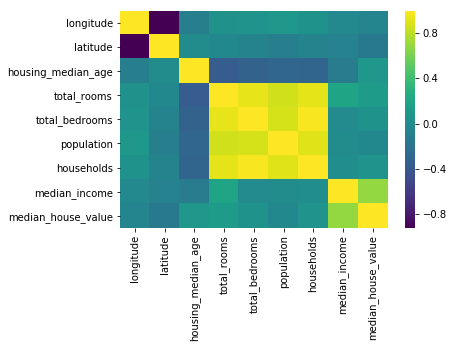

In [18]:
sns.heatmap(matrix_corr, cmap = 'viridis')

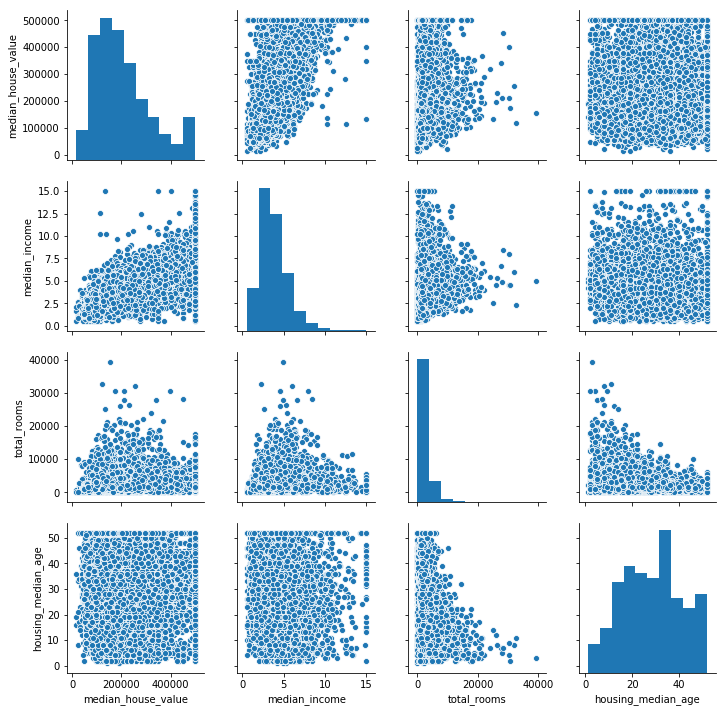

In [19]:
sns.pairplot(housing[['median_house_value','median_income', 'total_rooms','housing_median_age']])

Verificando agora somente a relação com a variavel que desejamos analisar. Percebe-se uma correlação positiva forte com a variável median_income.

In [20]:
matrix_corr['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Verificando somente o plot entre o median_house_value  e median_income. Pode=se notar que os dados foram limitados para valores acima de 500k.

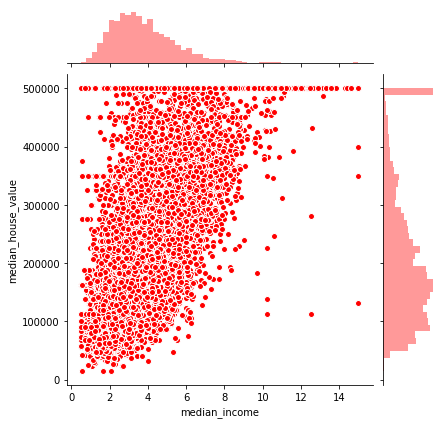

In [21]:
sns.jointplot(housing['median_income'],housing['median_house_value'], color = 'r', edgecolor = 'white')

### Combinação de atributos

O intuito agora é criar novos atributos combinando outros que estão diretamente relacionados

In [26]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

In [28]:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [29]:
housing['population_per_househol'] = housing['population']/housing['households']

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_househol
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [32]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value         1.000000
median_income              0.690647
rooms_per_household        0.158485
total_rooms                0.133989
housing_median_age         0.103706
households                 0.063714
total_bedrooms             0.047980
population_per_househol   -0.022030
population                -0.026032
longitude                 -0.046349
latitude                  -0.142983
bedrooms_per_room         -0.257419
Name: median_house_value, dtype: float64

### Preparando os dados para treinamento

In [33]:
housing = housing = train_set.drop('median_house_value',axis =1)
housing_labels = train_set['median_house_value'].copy()

Corrigindo o atributo 'total_bedrooms', acima foi verificado que possuia valores nulos. Portanto, vamos substituir esses valores nulo pela média da feature, afinal, são pouco mais de 1% dos dados.

In [37]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace = True)

Realizando o mesmo procedimeto com a Sklearn. Neste caso, o modulo impute realizará a mesma função, dado o tipo de estratégia escolhida, para todos os atributos caso seja encontrado um valor faltante.

In [43]:
from sklearn.impute import SimpleImputer

In [45]:
imputer = SimpleImputer(strategy = 'median')

Como 'ocean_proximity' não é uma feature numérica, ela será temporáriamente removiva. 

In [46]:
housing_num  = housing.drop('ocean_proximity',axis = 1)

In [47]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Após utilizar o método, vamos transformar os dados e salva-los em X, esta é uma variável do tipo numpy. Transformaremos de volta para um dataframe com as mesmas colunas da anterior.

In [48]:
X = imputer.transform(housing_num)

In [51]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [52]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [56]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_en = encoder.fit_transform(housing_cat)

In [61]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
encoder = OneHotEncoder(categories = 'auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_en.reshape(-1,1))